## Vineeth Reddy
## Data Science and Business Analytics Intern @ The Sparks Foundation
### Data Analysis on Terrorism

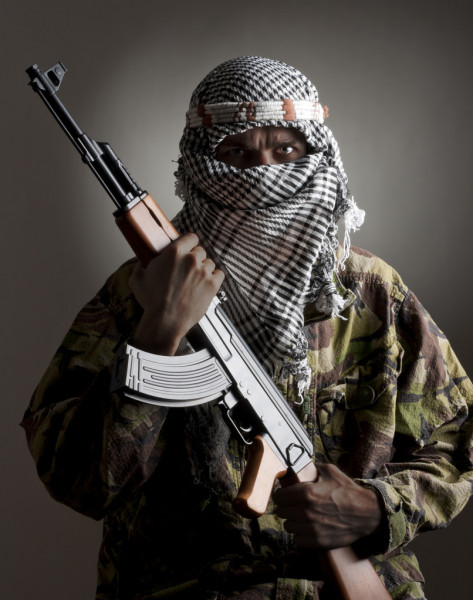

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data file
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1',header=0)
df.head()

C:\Users\vinee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#printing all the column values
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
#renaming the columns for easy access
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','natlty1_txt':'nationality_of_target','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
#as we can see there are lot of columns we only consider the columns which we feel are essential for analysis
df = df[['Year','Month','day','nationality_of_target','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive','success']]
df.head()

,Year,Month,day,nationality_of_target,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,success
0,1970,7,2,Dominican Republic,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [6]:
#we can combine kill and wound column to one column named casuality
df['Casualities']=df['kill']+df['Wound']

In [7]:
#now we dont need kill and wound columns
del df['kill']
del df['Wound']
df.head()

,Year,Month,day,nationality_of_target,Country,State,Region,City,latitude,longitude,Attacktype,target1,summary,Group,Targettype,Weapon,motive,success,Casualities
0,1970,7,2,Dominican Republic,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,1970,1,0,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,NaN
4,1970,1,0,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,NaN


In [8]:
#checking for null values
df.isnull().sum()

Year                          0
Month                         0
day                           0
nationality_of_target      1559
Country                       0
State                       421
Region                        0
City                        434
latitude                   4556
longitude                  4557
Attacktype                    0
target1                     636
summary                   66129
Group                         0
Targettype                    0
Weapon                        0
motive                   131130
success                       0
Casualities               16874
dtype: int64

In [9]:
#shape of the data
df.shape

(181691, 19)

In [10]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
Year                     181691 non-null int64
Month                    181691 non-null int64
day                      181691 non-null int64
nationality_of_target    180132 non-null object
Country                  181691 non-null object
State                    181270 non-null object
Region                   181691 non-null object
City                     181257 non-null object
latitude                 177135 non-null float64
longitude                177134 non-null float64
Attacktype               181691 non-null object
target1                  181055 non-null object
summary                  115562 non-null object
Group                    181691 non-null object
Targettype               181691 non-null object
Weapon                   181691 non-null object
motive                   50561 non-null object
success                  181691 non-null int64
Casualities              164

In [11]:
#statistics of the data
df.describe()

,Year,Month,day,latitude,longitude,success,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,9574.000000


## Now let's start visualizing the data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

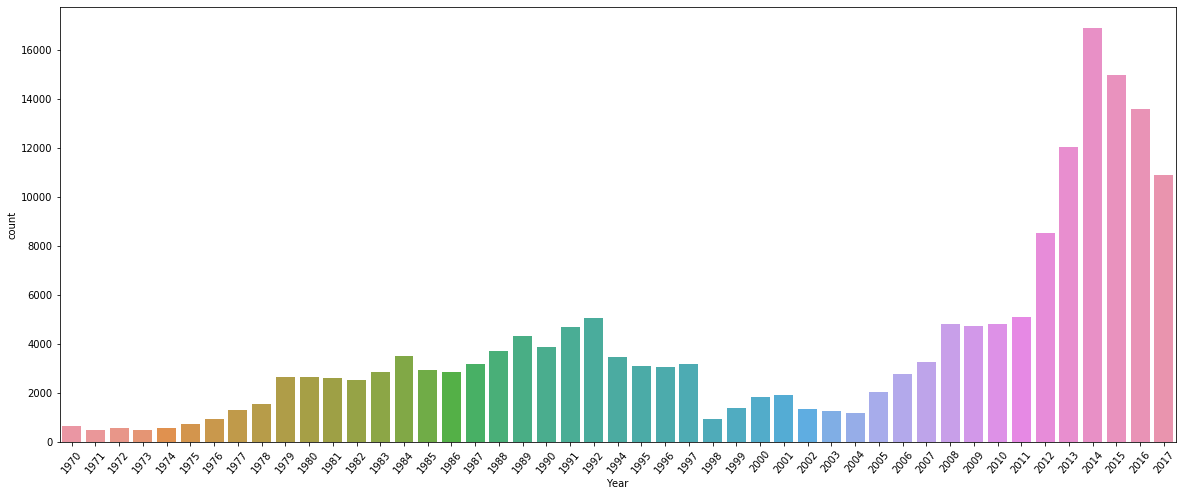

In [12]:
#Number of attacks ever year
plt.figure(figsize=(20,8))
sns.countplot(x='Year',data=df)
plt.xticks(rotation = 50)

Text(0.5, 0, 'Year')

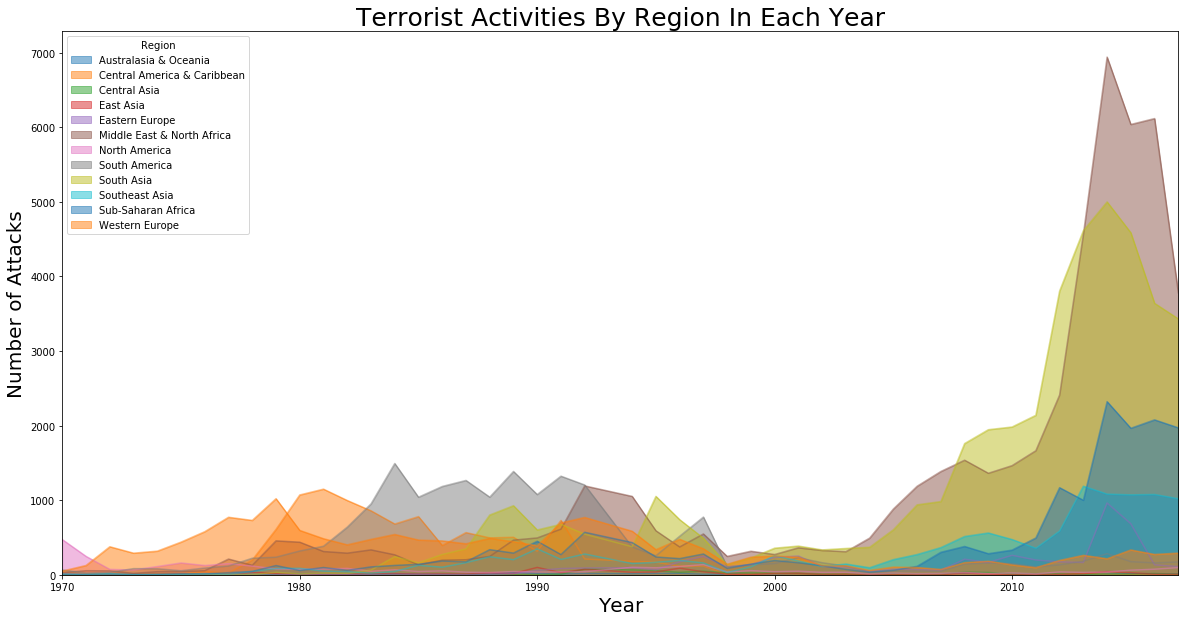

In [13]:
#Number of attacks by region in each year
pd.crosstab(df['Year'], df['Region']).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

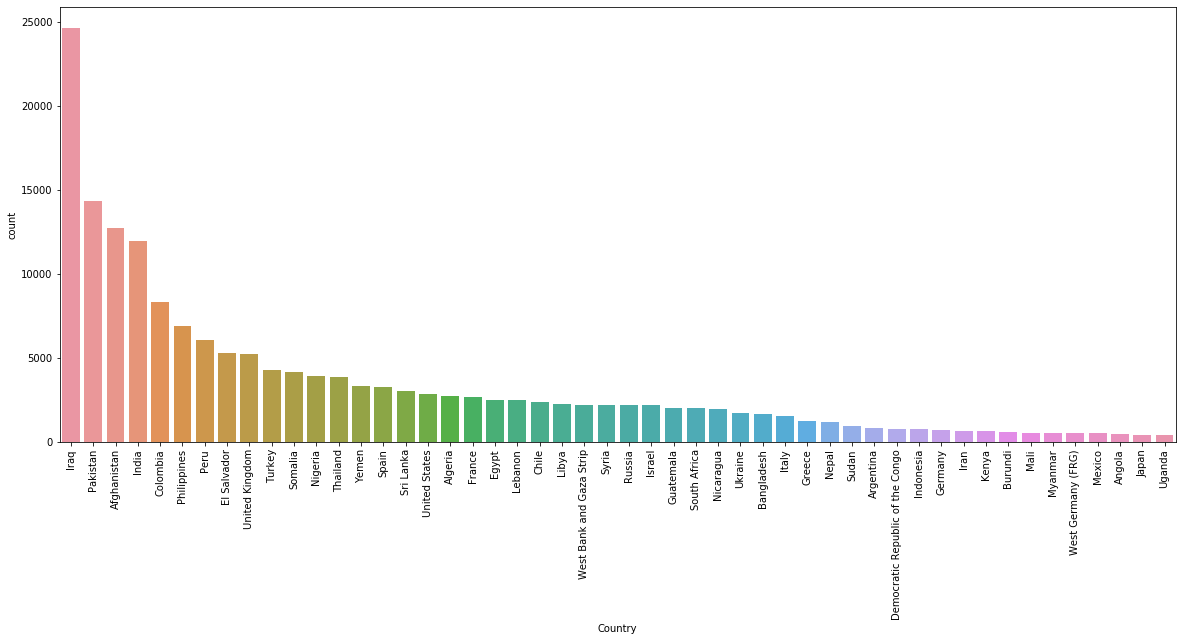

In [14]:
#Total number of attacks in every country
plt.figure(figsize=(20,8))
sns.countplot(x=df['Country'], order=(df['Country'].value_counts().head(50)).index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

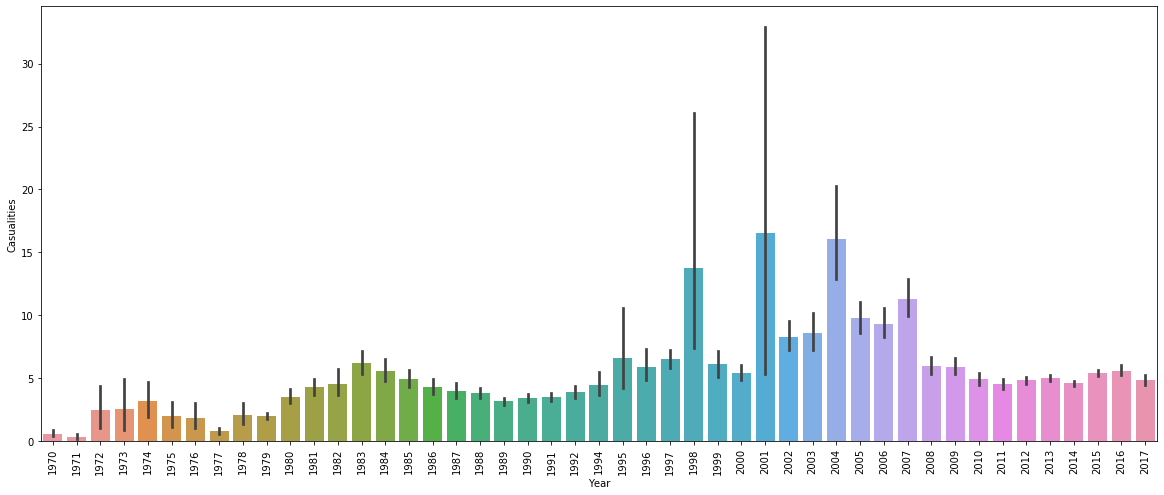

In [15]:
#Casualities of the attacks every year
plt.figure(figsize=(20,8))
sns.barplot(x="Year",y='Casualities', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

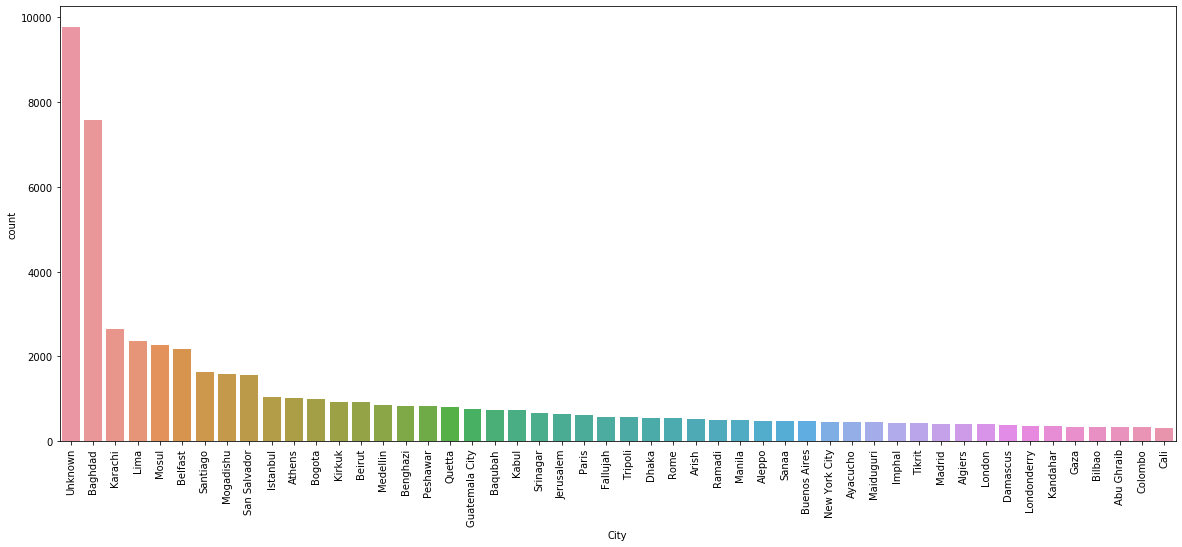

In [16]:
#Total number of attacks in every city
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

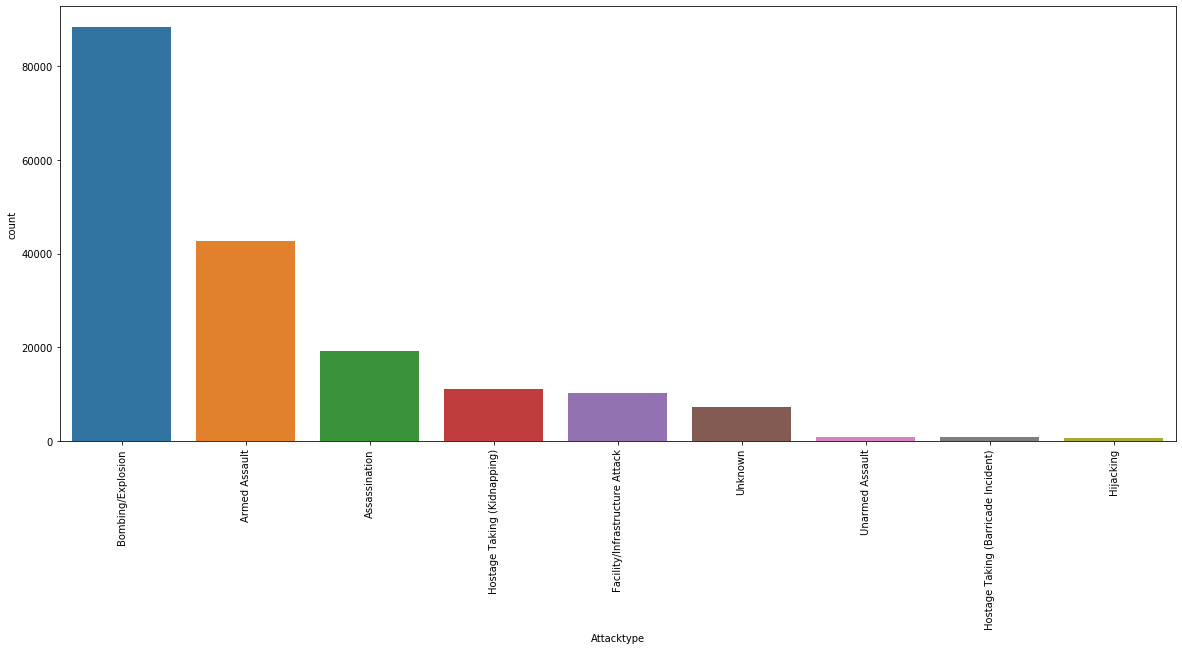

In [17]:
#Frequency of different attack type
plt.figure(figsize=(20,8))
sns.countplot(x=df['Attacktype'], order=(df['Attacktype'].value_counts().head(50)).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

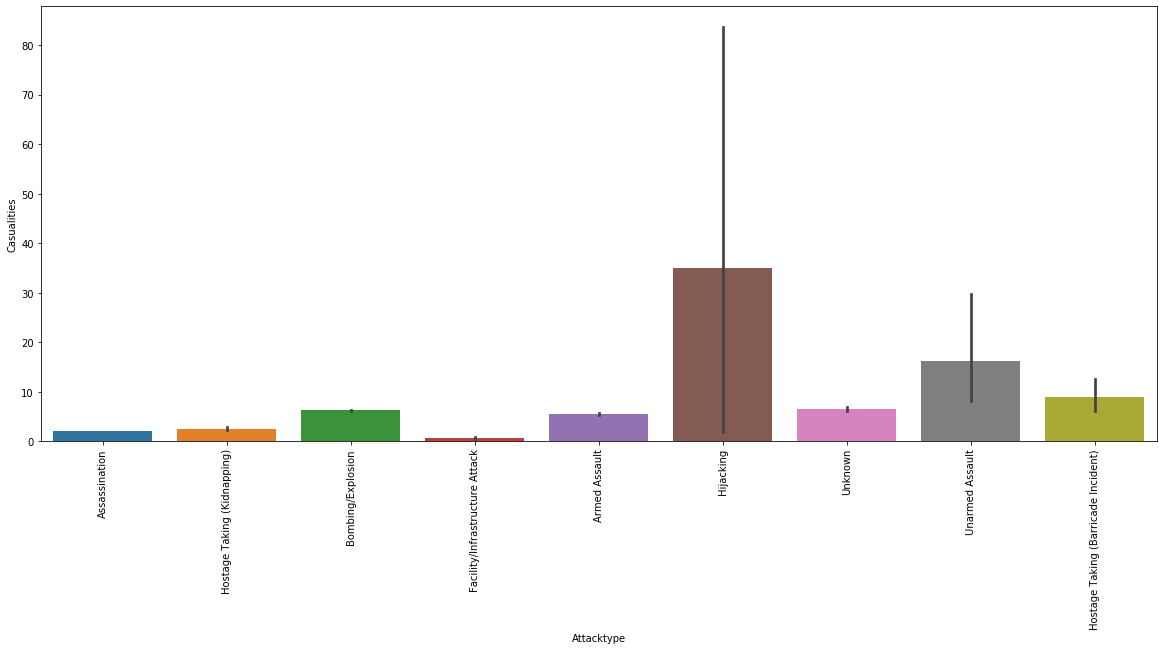

In [18]:
#Casualities in each attack type 
plt.figure(figsize=(20,8))
sns.barplot(x="Attacktype",y='Casualities', data=df)
plt.xticks(rotation=90)

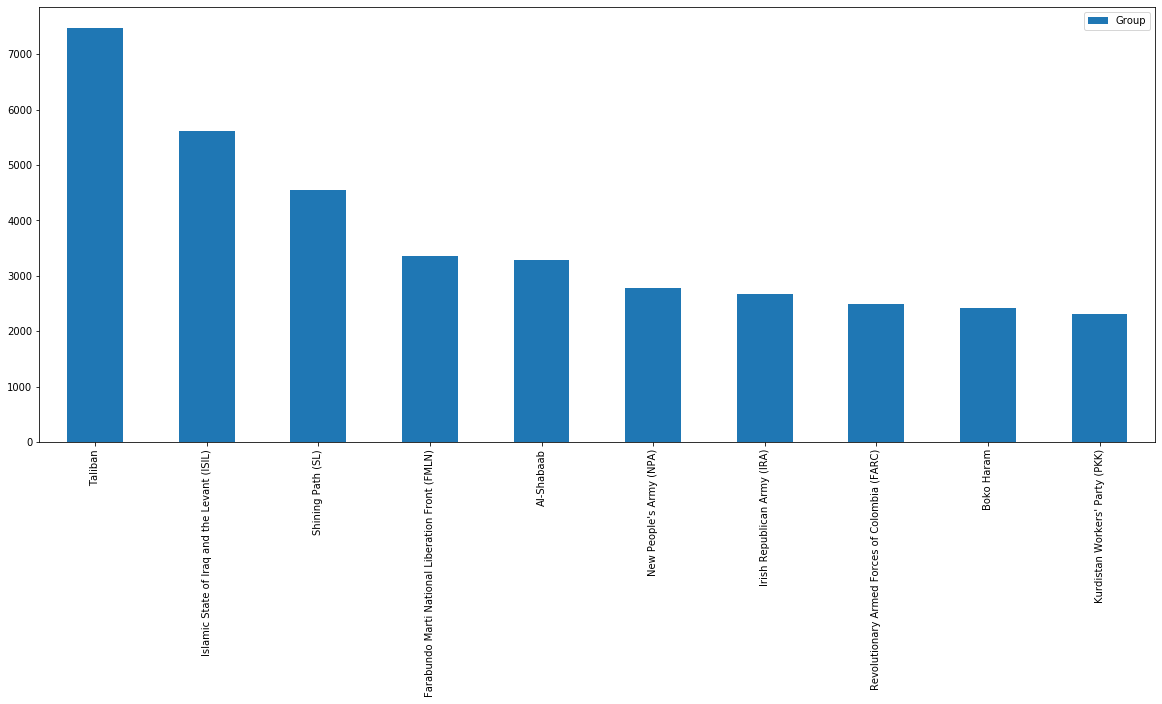

In [19]:
#number of attacks by each group of terrorists
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))

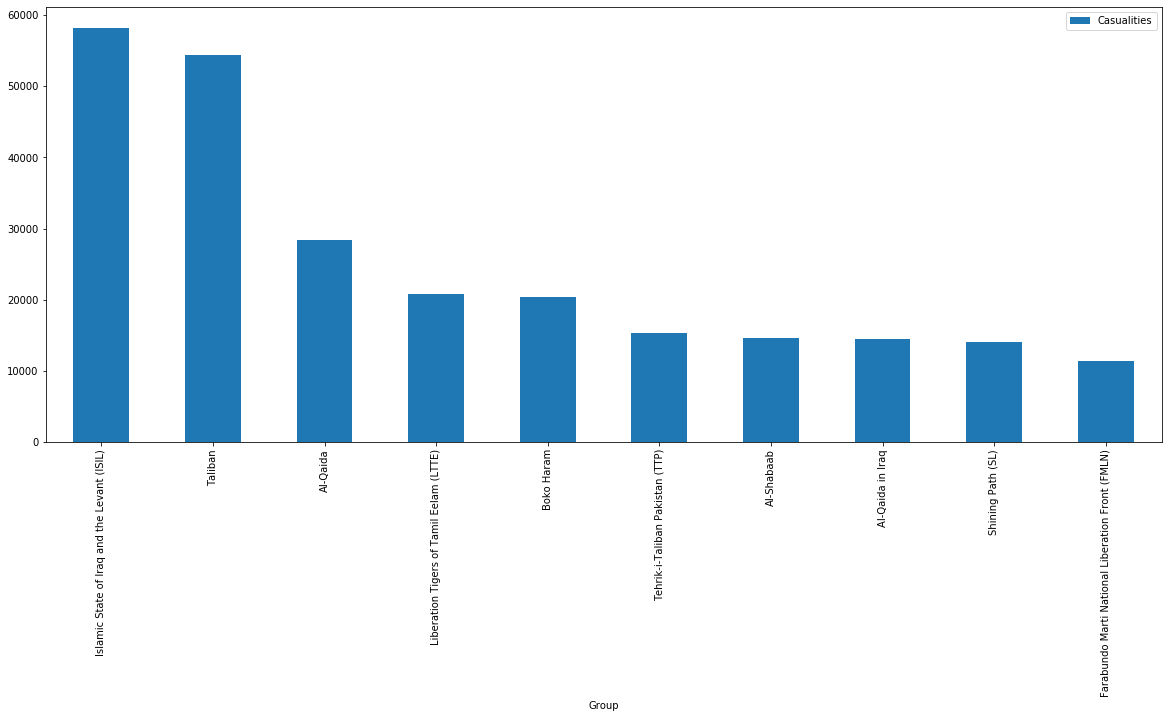

In [20]:
#Casualities caused by each terrorist group 
df[['Group','Casualities']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Casualities',ascending=False).head(10).plot(kind='bar',figsize=(20,8))

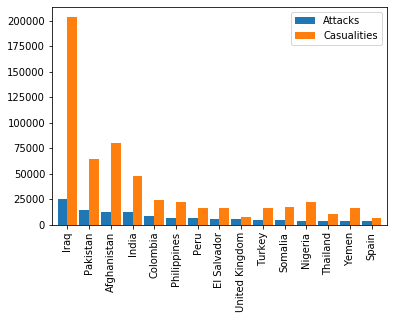

In [21]:
#number of attacks and casualties in each country
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['Casualities'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.show()

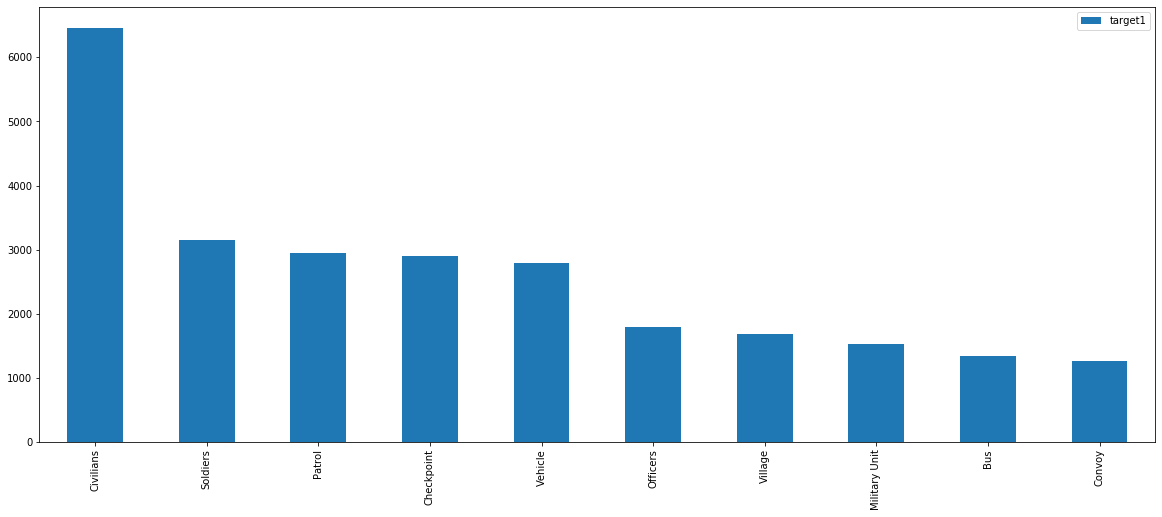

In [22]:
#target of each terrorist attack
df['target1'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))

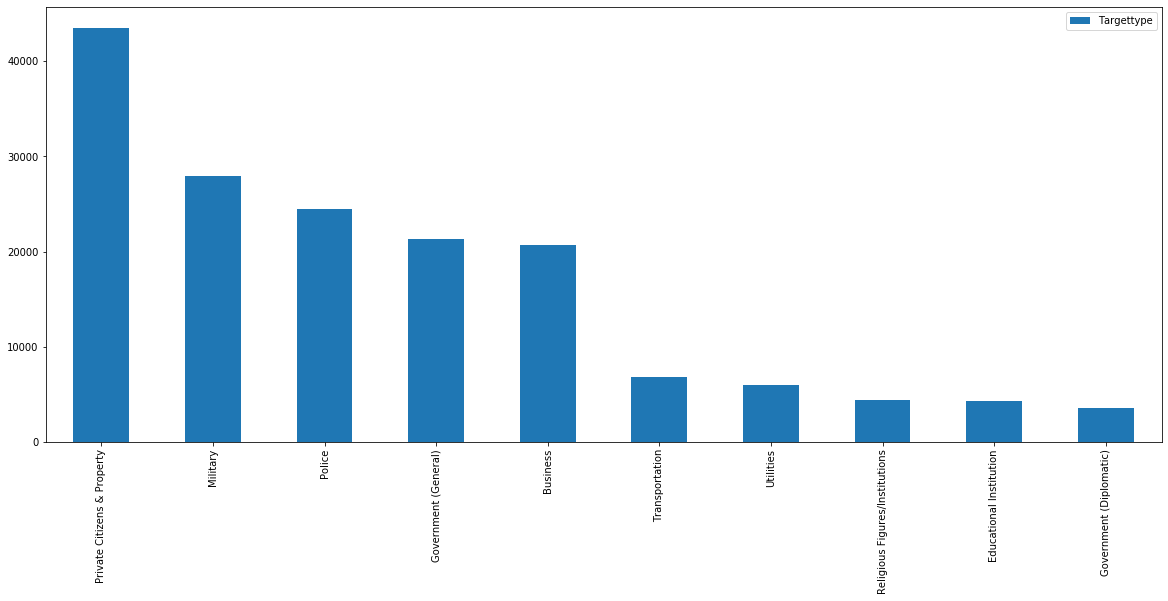

In [24]:
#targettype of each terrorist attack
df['Targettype'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))

## INSIGHTS :
#### Country with the most attacks: Iraq
#### Country with highest casualties: Iraq
#### City with the most attacks: Baghdad
#### Region with the most attacks: Middle East & North Africa
#### Year with the most attacks: 2014
#### Year with highest casualties: 2001
#### Group with the most attacks: Taliban
#### Group with highest casualties: Islamic State of Iraq and the Levant (ISIL)
#### Most Attack Types: Bombing/Explosion
#### Attack Type with highest casualties: Hijacking
#### Most targeted category of People: Civilians
#### Most targeted TargetType: Private Citizens & Property